In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump

In [2]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
print('Verfificando nulos:\n', df.isnull().sum())
print('Verfificando duplicatas:\n', df.duplicated().sum())

Verfificando nulos:
 Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64
Verfificando duplicatas:
 0


In [6]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Not Informed')

<ipython-input-7-124911395>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sleep Disorder', data=df, palette='Set2')


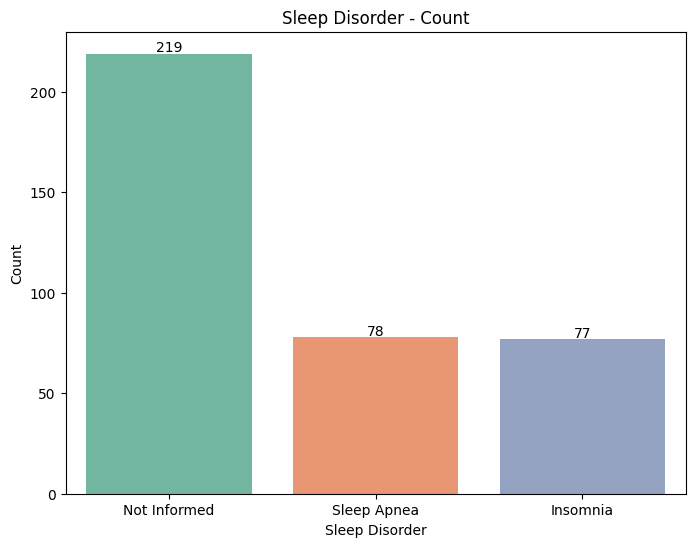

In [7]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Sleep Disorder', data=df, palette='Set2')
plt.title('Sleep Disorder - Count')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=int(height), ha='center')

plt.show()


<ipython-input-8-3895225749>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Quality of Sleep', data=df, palette='Set2', orient='h', order=df['Quality of Sleep'].value_counts().sort_values(ascending=False).index)


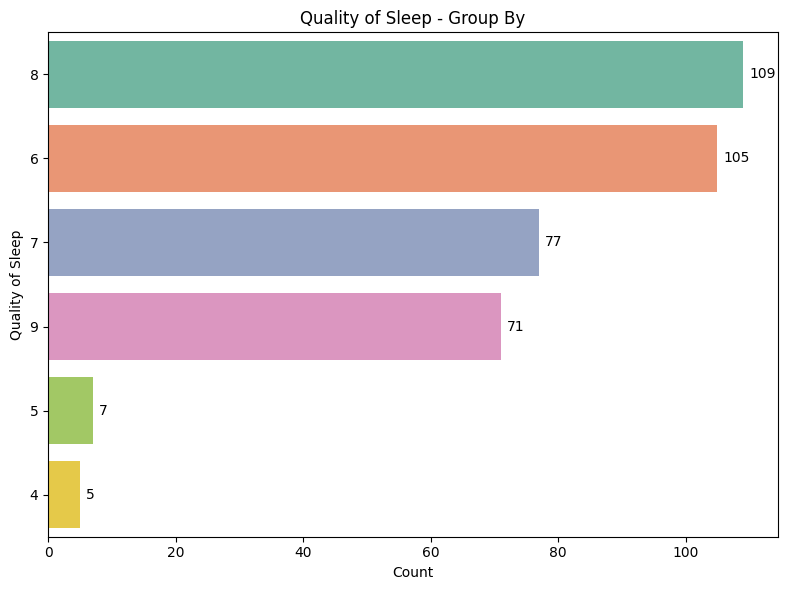

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Quality of Sleep', data=df, palette='Set2', orient='h', order=df['Quality of Sleep'].value_counts().sort_values(ascending=False).index)
plt.title('Quality of Sleep - Group By')
plt.xlabel('Count')

for p in ax.patches:
    width = p.get_width()
    ax.text(
        x=width + 1,
        y=p.get_y() + p.get_height() / 2,
        s=int(width), va='center')

plt.tight_layout()
plt.show()

In [9]:
def caracterizar_qualidade(valor):
  if valor <= 4:
    return 'Ruim'
  elif valor <= 7:
    return 'Média'
  else:
    return 'Bom'

In [10]:
df['Sleep_Quality_Label'] = df['Quality of Sleep'].apply(caracterizar_qualidade)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep_Quality_Label
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Not Informed,Média
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not Informed,Média
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Not Informed,Média
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Ruim
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Ruim


In [11]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

In [12]:
mapping_sleep_quality = {
    'Ruim':  1,
    'Média': 2,
    'Bom':   3
}

mapping_gender = {
    'Male':   0,
    'Female': 1
}

mapping_bmi = {
    'Normal':     1,
    'Overweight': 2,
    'Obese':      3

}

df['Sleep_Quality_Label'] = df['Sleep_Quality_Label'].map(mapping_sleep_quality)
df['Gender'] = df['Gender'].map(mapping_gender)
df['BMI Category'] = df['BMI Category'].map(mapping_bmi)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Sleep_Quality_Label
0,1,0,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,Not Informed,2
1,2,0,28,Doctor,6.2,6,60,8,1,125/80,75,10000,Not Informed,2
2,3,0,28,Doctor,6.2,6,60,8,1,125/80,75,10000,Not Informed,2
3,4,0,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,1
4,5,0,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,1


In [13]:
df = df.drop(columns=['Sleep Disorder', 'Blood Pressure', 'Occupation'])

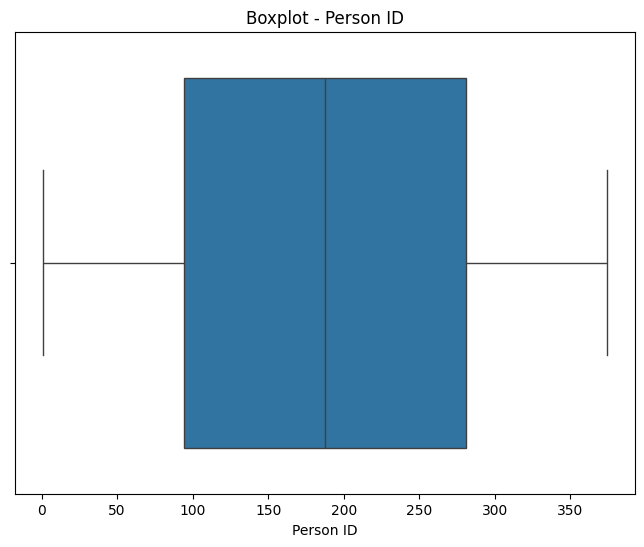

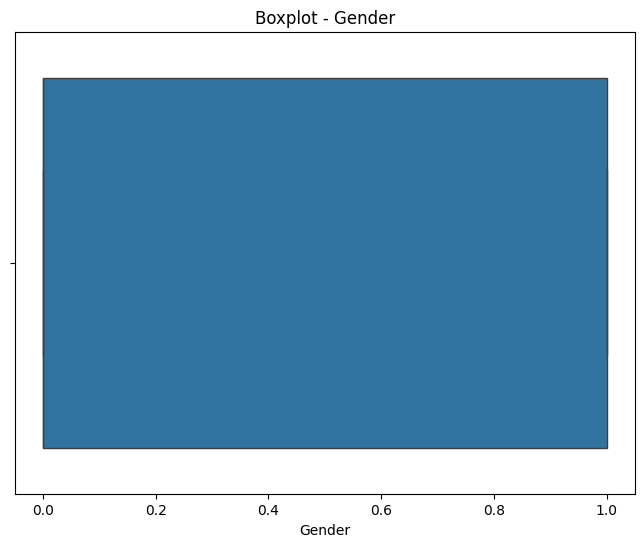

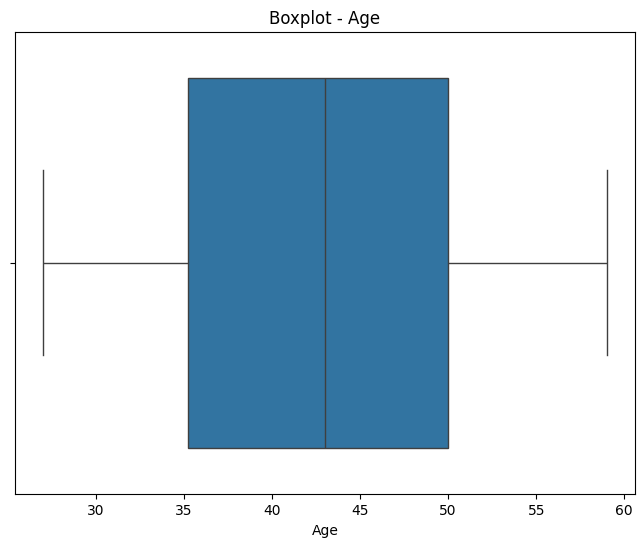

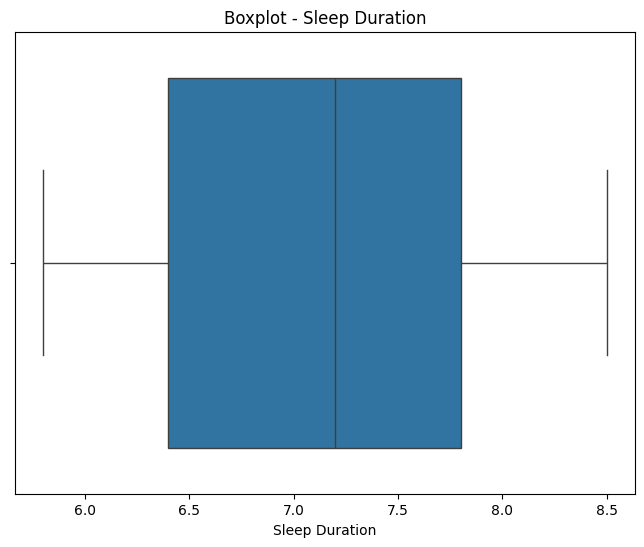

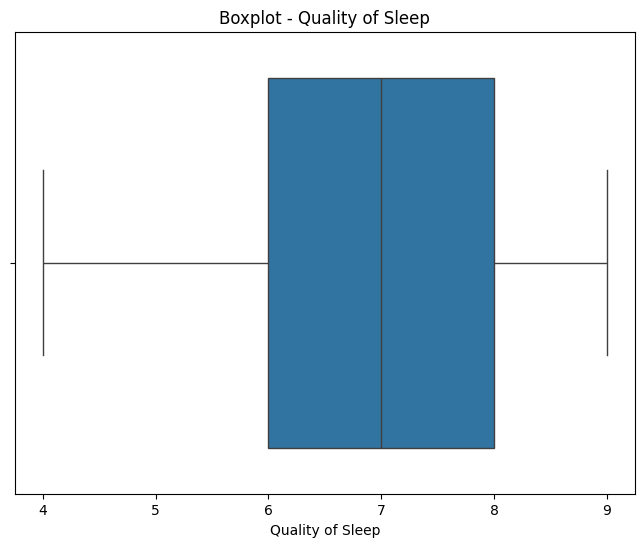

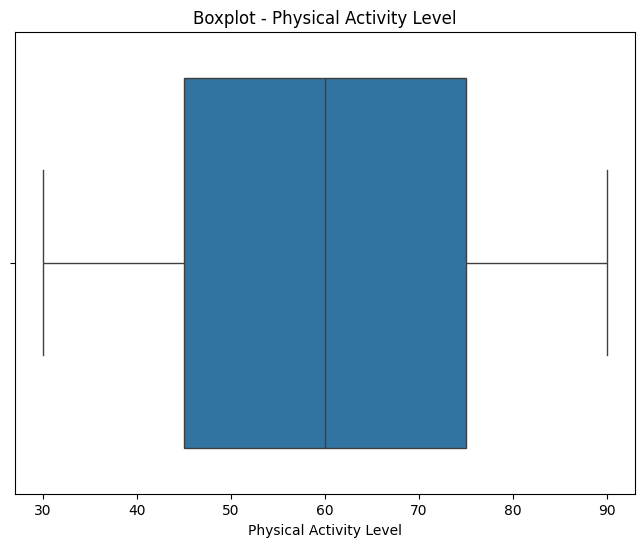

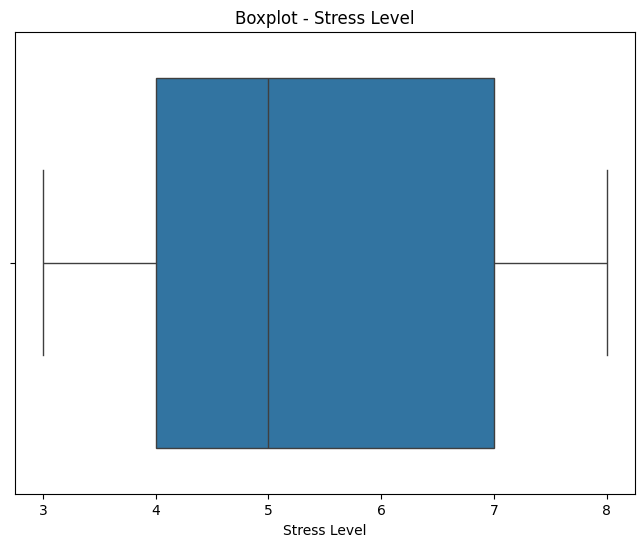

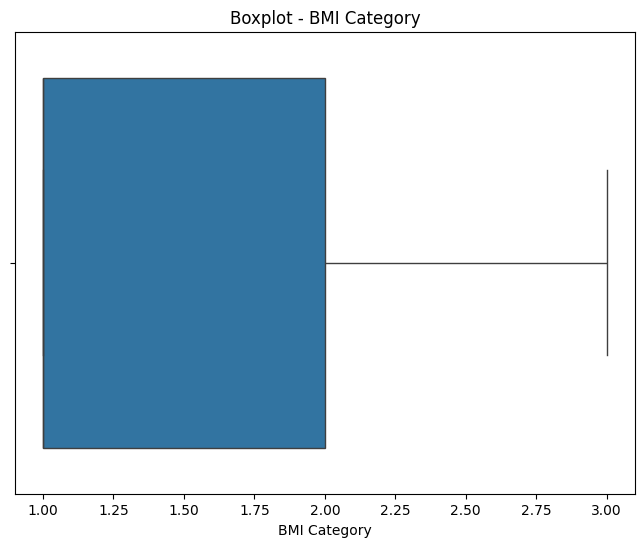

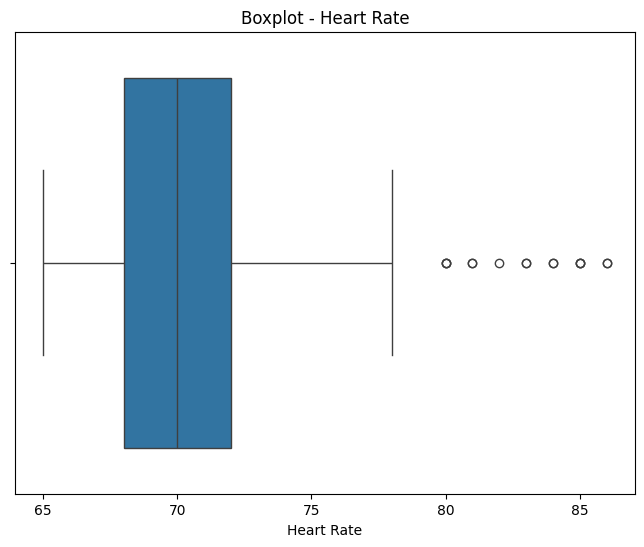

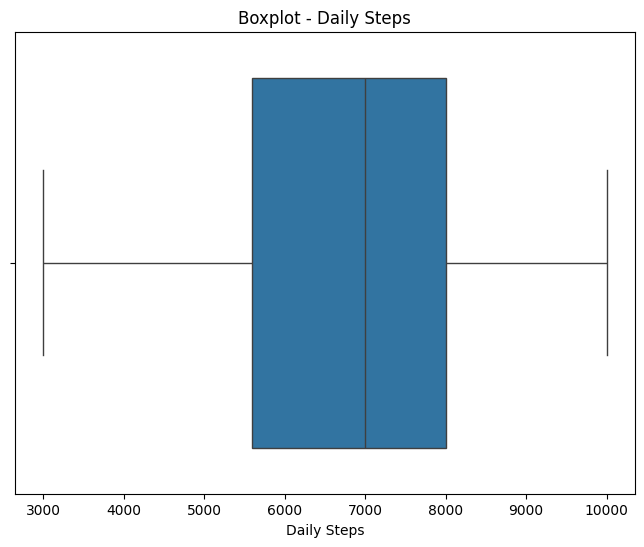

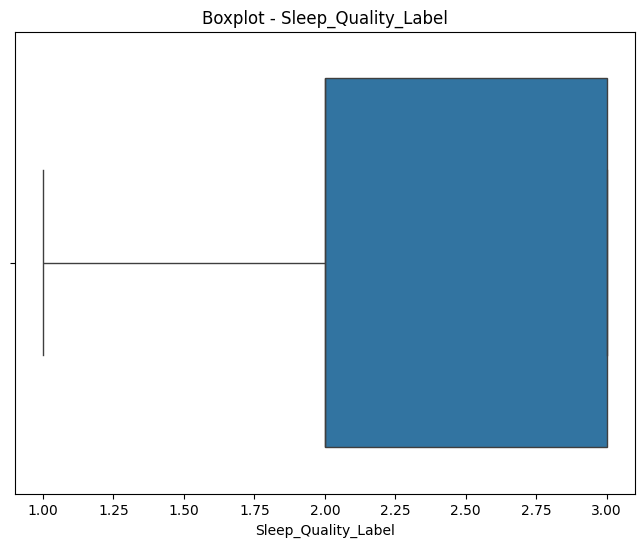

In [14]:
for coluna in df.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[coluna])
  plt.title(f'Boxplot - {coluna}')

In [15]:
Q1 = df['Heart Rate'].quantile(0.25)
Q3 = df['Heart Rate'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_outliers = df[(df['Heart Rate'] >= limite_inferior) & (df['Heart Rate'] <= limite_superior)]
df = df_outliers
df.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep_Quality_Label
0,1,0,27,6.1,6,42,6,2,77,4200,2
1,2,0,28,6.2,6,60,8,1,75,10000,2
2,3,0,28,6.2,6,60,8,1,75,10000,2
7,8,0,29,7.8,7,75,6,1,70,8000,2
8,9,0,29,7.8,7,75,6,1,70,8000,2


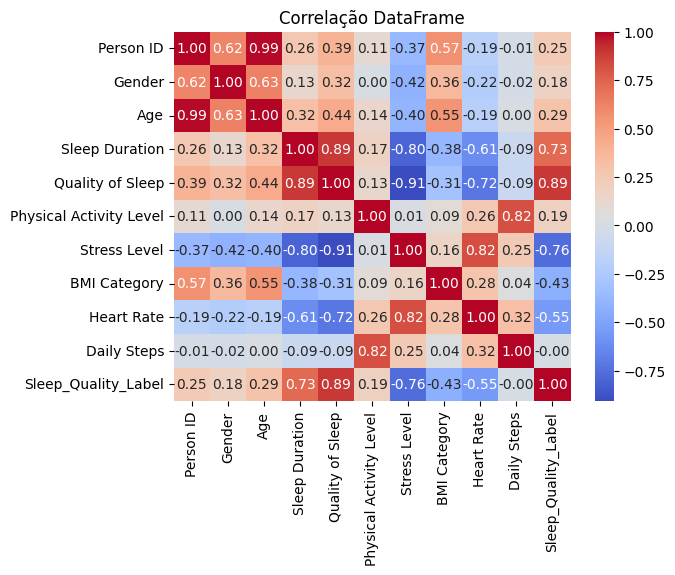

In [16]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlação DataFrame')
plt.show()

In [17]:
X = df[['Sleep Duration', 'Stress Level', 'Heart Rate', 'BMI Category', 'Physical Activity Level', 'Age', 'Gender']]
y = df['Sleep_Quality_Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
print('Acurácia:', accuracy_score(y_test, y_pred) * 100, '%')
print('classification_report', classification_report(y_test, y_pred))

Acurácia: 100.0 %
classification_report               precision    recall  f1-score   support

           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [22]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [23]:
print('Train Score:', train_score * 100, '%')
print('Test Score:', test_score * 100, '%')

Train Score: 100.0 %
Test Score: 100.0 %
